In [9]:
from ctlgeom import *

sphere = Sphere(1, (0, 0.5, 0), 1)
a = point_is_in_object((0.5, 0, 0), sphere)
b = point_is_in_object((1.5, 0, 0), sphere)
print(a, b)

True False


In [10]:
sphere.bounding_box()

((-1.0, -0.5, -1.0), (1.0, 1.5, 1.0))

In [11]:
sphere.debug_info()

sphere, center = (0,0.5,0)
     radius 1


In [12]:
actual_volume = 4/3 * np.pi * 1**3
print(f"Actual volume: {actual_volume}")
print(f"Calculated volume: {sphere.volume()}")

Actual volume: 4.1887902047863905
Calculated volume: 4.1887902047863905


In [5]:
sphere1 = Sphere(1 - 1j, (1, 0, 0), 0.1)
sphere2 = Sphere({"eps": 2}, (2, 0, 0), 0.1)
sphere3 = Sphere("foo", (3, 0, 0), 0.1)
group = ObjectGroup([sphere1, sphere2, sphere3])

print(group.material_at((1, 0, 0)))
print(group.material_at((2, 0, 0)))
print(group.material_at((3, 0, 0)))

(1-1j)
{'eps': 2}
foo


Time taken: 0.2274618148803711 seconds


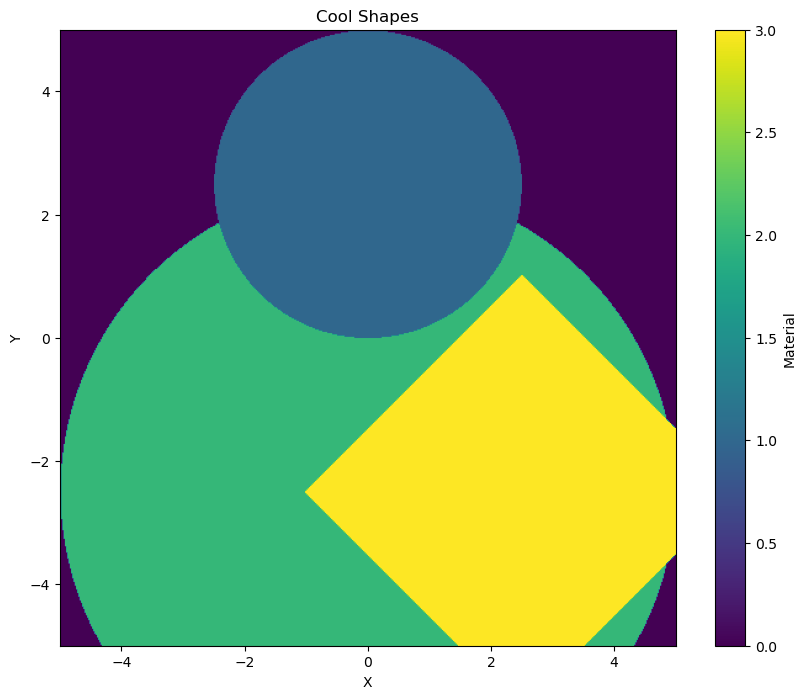

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time 

sphere1 = Sphere(material=1, center=(0, -0.5, 0), radius=0.5)
sphere2 = Sphere(material=2, center=(0, 0.5, 0), radius=1)
block = Block(material=3, center=(0.5, 0.5, 0), e1=(1, 1, 0), e2=(1, -1, 0), e3=(0, 0, 1), size=(1, 1, 1))
group = ObjectGroup([sphere2, sphere1, block])

# Create a grid of points
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
xx, yy = np.meshgrid(x, y)

def get_epsilon(x, y):
    mat = group.material_at((x, y, 0))
    return 0 if mat is None else mat
point_in_object_vec = np.vectorize(get_epsilon)

start_time = time.time()
material_map = point_in_object_vec(xx, yy)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

# Create the plot
plt.figure(figsize=(10, 8))
plt.imshow(material_map, cmap='viridis', extent=[-5, 5, -5, 5])
plt.colorbar(label='Material')
plt.title('Cool Shapes')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Time taken: 0.01887798309326172 seconds


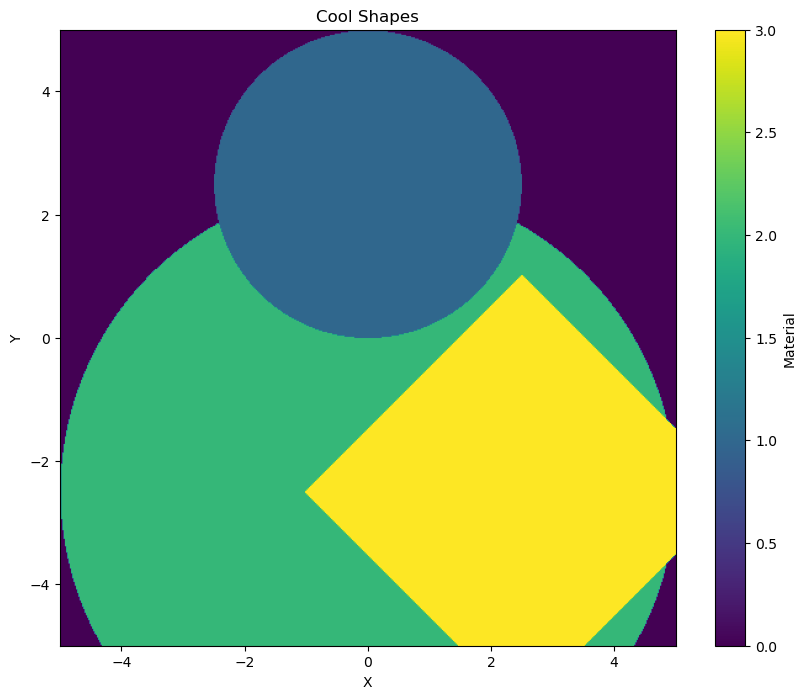

In [15]:
from ctlgeom import *
import numpy as np
import matplotlib.pyplot as plt
import time 

# This is the same as the previous example, but using the new function

sphere1 = Sphere(material=1, center=(0, -0.5, 0), radius=0.5)
sphere2 = Sphere(material=2, center=(0, 0.5, 0), radius=1)
block = Block(material=3, center=(0.5, 0.5, 0), e1=(1, 1, 0), e2=(1, -1, 0), e3=(0, 0, 1), size=(1, 1, 1))
group = ObjectGroup([sphere2, sphere1, block])

# Create a grid of points
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
xx, yy = np.meshgrid(x, y)
points = np.array([xx.flatten(), yy.flatten(), np.zeros_like(xx.flatten())]).T

start_time = time.time()
material_map = geom.material_of_numpy_points_in_tree(points, group.geom_box_tree)
material_map = np.array(material_map, dtype=float).reshape(xx.shape)
material_map = np.nan_to_num(material_map)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

# Create the plot
plt.figure(figsize=(10, 8))
plt.imshow(material_map, cmap='viridis', extent=[-5, 5, -5, 5])
plt.colorbar(label='Material')
plt.title('Cool Shapes')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Time taken: 0.23345279693603516 seconds


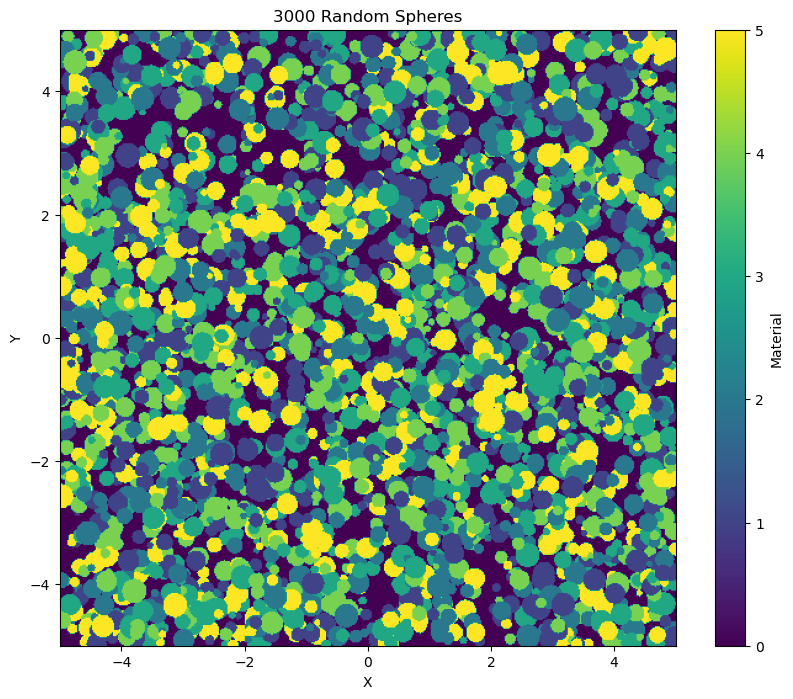

In [8]:
np.random.seed(42)
spheres = []
for _ in range(3000):
    x = np.random.uniform(-5, 5)
    y = np.random.uniform(-5, 5)
    radius = np.random.uniform(0.05, 0.2)
    material = np.random.randint(1, 6)
    
    sphere = Sphere(material=material, center=(x, y, 0), radius=radius)
    spheres.append(sphere)

group = ObjectGroup(spheres)

x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)
xx, yy = np.meshgrid(x, y)

def get_epsilon(x, y):
    mat = group.material_at((x, y, 0))
    return 0 if mat is None else mat
point_in_object_vec = np.vectorize(get_epsilon)

start_time = time.time()
material_map = point_in_object_vec(xx, yy)
end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")

# Create the plot
plt.figure(figsize=(10, 8))
plt.imshow(material_map, cmap='viridis', extent=[-5, 5, -5, 5])
plt.colorbar(label='Material')
plt.title('3000 Random Spheres')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()